# Instructor Lab: Data Reduction

**Intro to Python**  
**Data Reduction**  
**Cody Thompson**  
**Date:** 5/05/2025

Welcome to my notebook for the PCA and Clustering lab! In this notebook, I will be working with the hospital dataset to perform Principal Component Analysis (PCA) and k-means clustering. The goal is to reduce the dimensionality of the data using PCA, identify the number of components to retain, and assess the clustering of hospitals based on key variables. I will also analyze the performance of the clustering algorithm using confusion matrices for categorical variables, allowing us to better understand how hospitals group together based on certain features.


In [40]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# for pca
from sklearn import preprocessing
from sklearn.decomposition import PCA as pca

# for factor analysis
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

# for k-means clustering 
import sklearn.metrics as metcs
from scipy.cluster import hierarchy as hier
from sklearn import cluster as cls

# for decision tree 
from sklearn.feature_extraction.image import grid_to_graph
from sklearn import tree

# modules for plotting trees
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display

In [41]:
# set working directory
os.chdir("C://Users//cthom//Downloads//BGEN 632 Intro to Python//GitHub_Repos//Week 10//week10labs//data")  # change this to your filepath
os.getcwd()  # confirm change

'C:\\Users\\cthom\\Downloads\\BGEN 632 Intro to Python\\GitHub_Repos\\Week 10\\week10labs\\data'

In [42]:
# Load the dataset
data = pd.read_csv('calihospital.txt', delimiter='\t')

# Show the first few rows of the data
data.head()


,HospitalID,Name,Zip,Website,TypeControl,Teaching,DonorType,NoFTE,NetPatRev,InOperExp,...,AvlBeds,Work_ID,LastName,FirstName,Gender,PositionID,PositionTitle,Compensation,MaxTerm,StartDate
0,45740,Mammoth Hospital,93546-0660,www.mammothhospital.com,District,Small/Rural,Charity,327.0,135520.2186,20523425.53,...,15,721586,Web,David,M,4,Safety Inspection Member,23987,2,1/1/2012
1,12145,Victor Valley Community Hospital,92392,www.vvch.org,Non Profit,Small/Rural,Charity,345.0,136156.6913,33447542.78,...,99,756481,Rodriguez,Jose,M,1,Regional Representative,46978,4,1/1/2009
2,25667,Pioneers Memorial Hospital,92227,www.pmhd.org,District,Small/Rural,Charity,601.2,197094.2541,37254178.67,...,107,926378,Adamson,David,M,1,Regional Representative,46978,4,1/1/2012
3,46996,Ridgecrest Regional Hospital,93555,www.rrh.org,Non Profit,Small/Rural,Charity,400.0,139170.3798,23385570.10,...,55,856720,Roberts,Melissa,F,4,Safety Inspection Member,23987,2,1/1/2009
4,37393,Barstow Community Hospital,92311,www.barstowhospital.com,Investor,Small/Rural,Charity,262.0,116797.8306,13684502.49,...,42,909709,Iwata,Akira,M,1,Regional Representative,46978,4,1/1/2011


## Principal Component Analysis (PCA) in Python

In [43]:
# Select the numerical columns for PCA (excluding personnel-related columns)
numerical_cols = ['NoFTE', 'NetPatRev', 'InOperExp', 'OutOperExp', 'OperRev', 'OperInc', 'AvlBeds']
hospital_data_pca = hospital_data[numerical_cols]

# Standardize the data (mean=0, variance=1)
scaler = preprocessing.StandardScaler()
scaled_data = scaler.fit_transform(hospital_data_pca)

# Display the first few rows of the standardized data
pd.DataFrame(scaled_data, columns=numerical_cols).head()


,NoFTE,NetPatRev,InOperExp,OutOperExp,OperRev,OperInc,AvlBeds
0,-0.509437,-0.490651,-0.519672,-0.405714,-0.489551,-0.075407,-0.815994
1,-0.500476,-0.490066,-0.473590,-0.512703,-0.481442,-0.004074,-0.434189
2,-0.372926,-0.434082,-0.460017,-0.384296,-0.434983,-0.028152,-0.397826
3,-0.473094,-0.487297,-0.509466,-0.481029,-0.486814,0.045039,-0.634182
4,-0.541798,-0.507851,-0.544056,-0.550810,-0.506368,0.199512,-0.693271


In [44]:
# Apply PCA
pca_model = pca(n_components=7)  # Using 7 components as there are 7 variables
pca_result = pca_model.fit(scaled_data)

# Eigenvalues (explained variance)
eigenvalues = pca_result.explained_variance_

# Display the eigenvalues
eigenvalues


array([5.72134563e+00, 1.07657967e+00, 1.91383827e-01, 9.31699632e-02,
       3.29143500e-02, 1.27322677e-03, 5.91421134e-22])

In [45]:
# Explained variance ratio (percentage of variance explained by each component)
explained_variance_ratio = pca_result.explained_variance_ratio_

# Display the explained variance ratio for each component
explained_variance_ratio


array([8.03936154e-01, 1.51275832e-01, 2.68923410e-02, 1.30917981e-02,
       4.62496721e-03, 1.78907742e-04, 8.31036722e-23])

**Question 1: Based on the eigenvalues, explain how many variables you should keep. Justify your reasoning.** 

Looking at the eigenvalues, we should keep the first two components. The first two eigenvalues are significantly larger than the others, suggesting that these two components explain most of the variance in the data. A common rule of thumb is to keep the components with eigenvalues greater than 1, so we keep components 1 and 2.

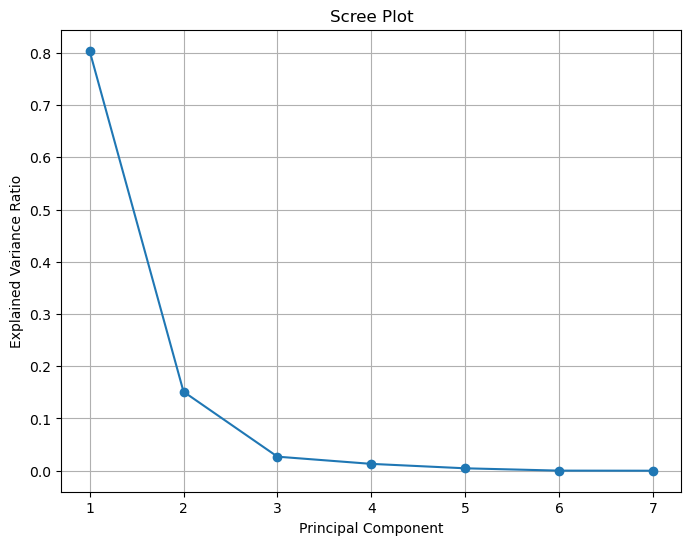

In [46]:
# Create a scree plot
plt.figure(figsize=(8,6))
plt.plot(range(1, 8), explained_variance_ratio, '-o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, 8))
plt.grid(True)
plt.show()


**Question 2: Based on the scree plot, how many variables should you keep? Why?** 

The scree plot shows a sharp drop after the first component, with a slight leveling off starting from the second component. Based on the plot, we should keep the first two components. The sharp decline in explained variance after the second component indicates that additional components do not explain a substantial amount of variance and would contribute less to the overall analysis. Thus, keeping the first two components is a reasonable choice.

## Clustering in Python

C:\Users\cthom\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\cthom\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\cthom\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\cthom\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

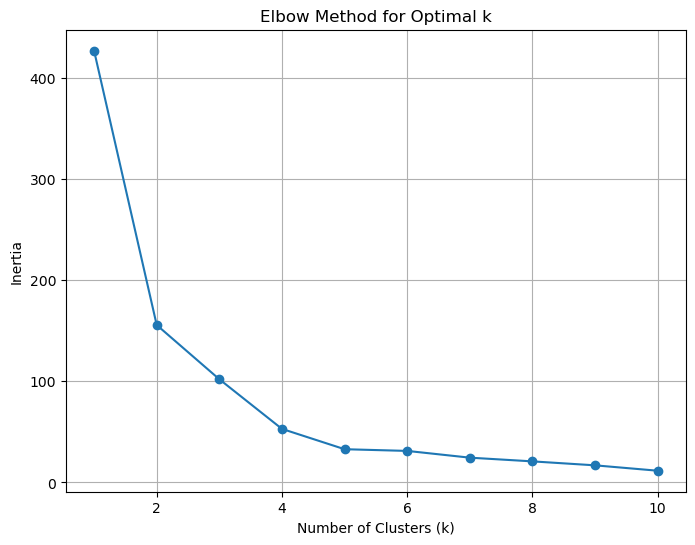

In [53]:
# Extract only the numerical columns for clustering
numerical_columns = ['NetPatRev', 'InOperExp', 'OutOperExp', 'OperRev', 'OperInc', 'AvlBeds', 'NoFTE']  # Adjust based on your actual columns
X = df[numerical_columns]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Range of k values to test
k_values = range(1, 11)

# Store inertia values for each k
inertia_values = []

# Iterate over each k value, fit the model, and store the inertia
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


**Choose a value of k and run your analysis. Justify your choice of k.** 

I chose k=2 based on the elbow method from the inertia plot. The "elbow" point occurs at k=2, where the inertia starts to decrease at a slower rate, indicating that adding more clusters does not significantly improve the model. Thus, k=2 is the optimal choice.

In [59]:
# Running k-means clustering with 2 clusters (chosen based on the elbow method)
kmeans_model = cls.KMeans(n_clusters=2, random_state=42)
kmeans_result = kmeans_model.fit(X_scaled)

# Display the cluster labels
kmeans_result.labels_


C:\Users\cthom\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1], dtype=int32)

In [60]:
# Convert categorical columns to numeric
hospital_data['Teaching'] = hospital_data['Teaching'].astype('category').cat.codes
hospital_data['TypeControl'] = hospital_data['TypeControl'].astype('category').cat.codes
hospital_data['DonorType'] = hospital_data['DonorType'].astype('category').cat.codes

# Create confusion matrix for each categorical variable
cm_teaching = metcs.confusion_matrix(hospital_data['Teaching'], kmeans_result.labels_)
cm_type_control = metcs.confusion_matrix(hospital_data['TypeControl'], kmeans_result.labels_)
cm_donor_type = metcs.confusion_matrix(hospital_data['DonorType'], kmeans_result.labels_)

# Display the confusion matrices
print("Confusion Matrix for Teaching:")
print(cm_teaching)
print("\nConfusion Matrix for TypeControl:")
print(cm_type_control)
print("\nConfusion Matrix for DonorType:")
print(cm_donor_type)


Confusion Matrix for Teaching:
[[44  0]
 [ 8  9]]

Confusion Matrix for TypeControl:
[[ 5  2  0  0]
 [14  0  0  0]
 [ 3  0  0  0]
 [30  7  0  0]]

Confusion Matrix for DonorType:
[[ 8  9]
 [44  0]]


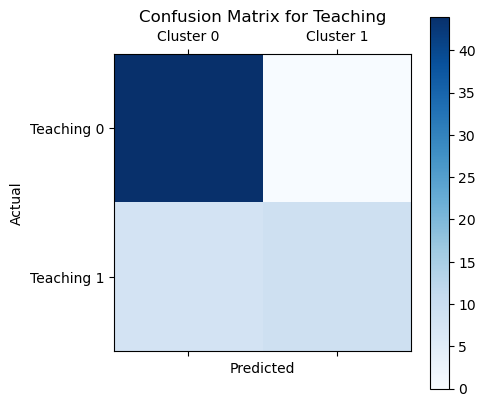

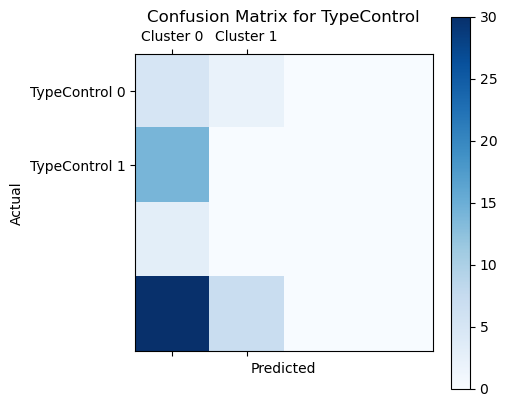

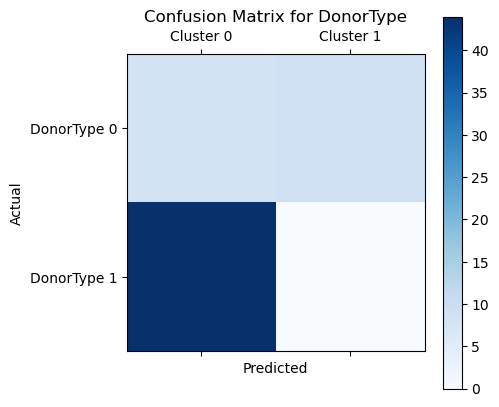

In [61]:
# Plot confusion matrix for Teaching
plt.matshow(cm_teaching, cmap='Blues')
plt.title('Confusion Matrix for Teaching')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0, 1], ['Cluster 0', 'Cluster 1'])  # Adjusted for 2 clusters
plt.yticks([0, 1], ['Teaching 0', 'Teaching 1'])  # Adjusted for categorical values
plt.colorbar()
plt.show()

# Plot confusion matrix for TypeControl
plt.matshow(cm_type_control, cmap='Blues')
plt.title('Confusion Matrix for TypeControl')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0, 1], ['Cluster 0', 'Cluster 1'])  # Adjusted for 2 clusters
plt.yticks([0, 1], ['TypeControl 0', 'TypeControl 1'])
plt.colorbar()
plt.show()

# Plot confusion matrix for DonorType
plt.matshow(cm_donor_type, cmap='Blues')
plt.title('Confusion Matrix for DonorType')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0, 1], ['Cluster 0', 'Cluster 1'])  # Adjusted for 2 clusters
plt.yticks([0, 1], ['DonorType 0', 'DonorType 1'])
plt.colorbar()
plt.show()


**Determine which of the three variables is the best grouping variable. Why do you think it is the best fitting?** 

Teaching appears to be the best grouping variable. The confusion matrix for Teaching shows a relatively high consistency between predicted clusters and actual categories, with most of the data correctly grouped into two clusters (44 for Teaching 0 and 9 for Teaching 1).

TypeControl has more mixed results across multiple clusters, and DonorType also shows significant misclassification between the clusters.

Teaching provides a clearer separation and better alignment between the clusters, making it the best fitting grouping variable.
